<a href="https://colab.research.google.com/github/ahmed-loutfy/DL-FaceMaskDetector-Project/blob/main/Copy_of_MaskDetectionCNN_VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Face Mask Detection**


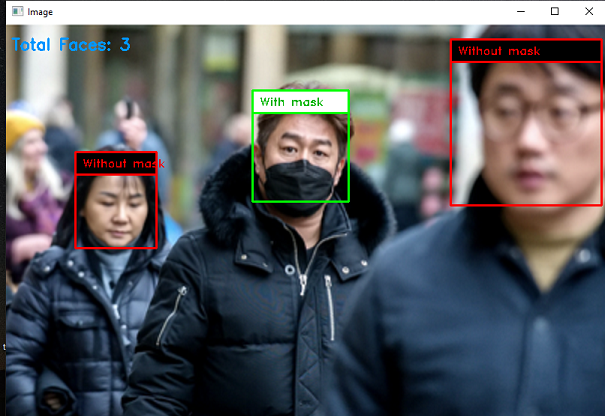


**Objective** is to build a Deep Learning model which can identify if the person is wearing a mask or not.

# Installing kaggle and downloading the dataset

In [ ]:
! pip install kaggle

#create a kaggle folder
! mkdir ~/.kaggle

#3. Copy the “kaggle.json” to folder created
! cp kaggle.json ~/.kaggle/

# Allocate the required permission for this file.
! chmod 600 ~/.kaggle/kaggle.json

# to list all datasets in kaggle
! kaggle datasets list
! kaggle datasets download ashishjangra27/face-mask-12k-images-dataset
! unzip face-mask-12k-images-dataset.zip


mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-12 11:59:54          18311  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          10992  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           5525  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3903  
nickuzmenkov/nih

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
from glob import glob
import random
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint

#Load train and test set


In [ ]:
train_dir = "/content/Face Mask Dataset/Train"
val_dir = "/content/Face Mask Dataset/Validation"
test_dir = '/content/Face Mask Dataset/Test'

In [ ]:
x_data = [] 
y_data = [] 
for category in glob(train_dir+'/*'):
    for file in glob(category+'/*'):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array) 
        y_data.append(category.split("/")[-1])
data=pd.DataFrame({'image': x_data,'label': y_data})

In [ ]:
data.head()

image        label
0  [[[54, 40, 31], [54, 40, 29], [56, 42, 31], [5...  WithoutMask
1  [[[81, 60, 33], [118, 96, 72], [83, 61, 37], [...  WithoutMask
2  [[[29, 30, 35], [36, 37, 42], [35, 36, 41], [3...  WithoutMask
3  [[[103, 68, 38], [88, 49, 16], [108, 68, 33], ...  WithoutMask
4  [[[64, 29, 27], [48, 33, 30], [44, 30, 29], [3...  WithoutMask

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   10000 non-null  object
 1   label   10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


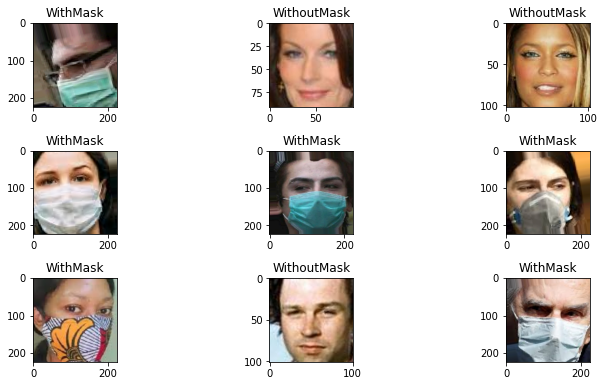

In [ ]:
plt.figure(figsize=(10,7))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(10000)
    plt.title( data.loc[index]['label'] )
    plt.imshow(data.image[index])
    plt.tight_layout()

In [ ]:
def show_image(path):
    plt.figure(figsize=(10, 4))
    for i in range(10):
        plt.subplot(2, 5, i+1)
        img = random.choice(os.listdir(path))
        image = load_img(os.path.join(path, img))
        label = path.split('/')[-1]
        if label == "WithoutMask":
            plt.suptitle("Without mask")
        else:
            plt.suptitle("With mask")
        plt.imshow(image)

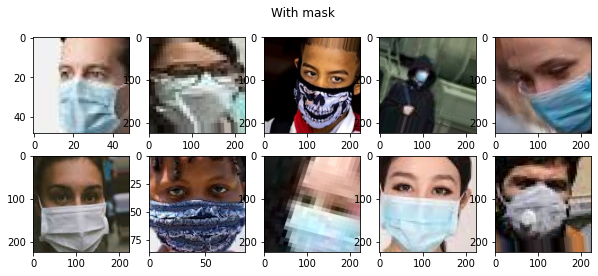

In [ ]:
show_image("/content/Face Mask Dataset/Train/WithMask")


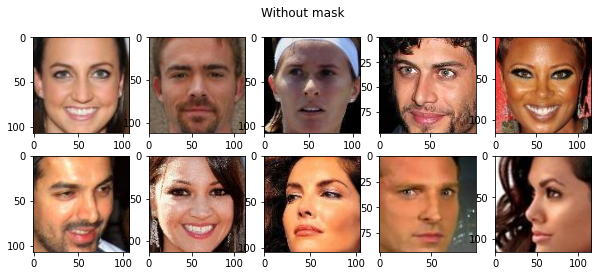

In [ ]:
show_image("/content/Face Mask Dataset/Validation/WithoutMask")


# Using haar cascade to detect faces
Object Detection using Haar feature-based cascade classifiers is an effective object detection method proposed by Paul Viola and Michael Jones in their paper, "Rapid Object Detection using a Boosted Cascade of Simple Features" in 2001. It is a machine learning based approach where a cascade function is trained from a lot of positive and negative images. It is then used to detect objects in other images. We'll be using a Haar Cascade Model trained to detect faces in order to obtain the bounding box coordinates of faces in an image.

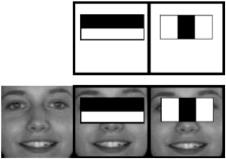

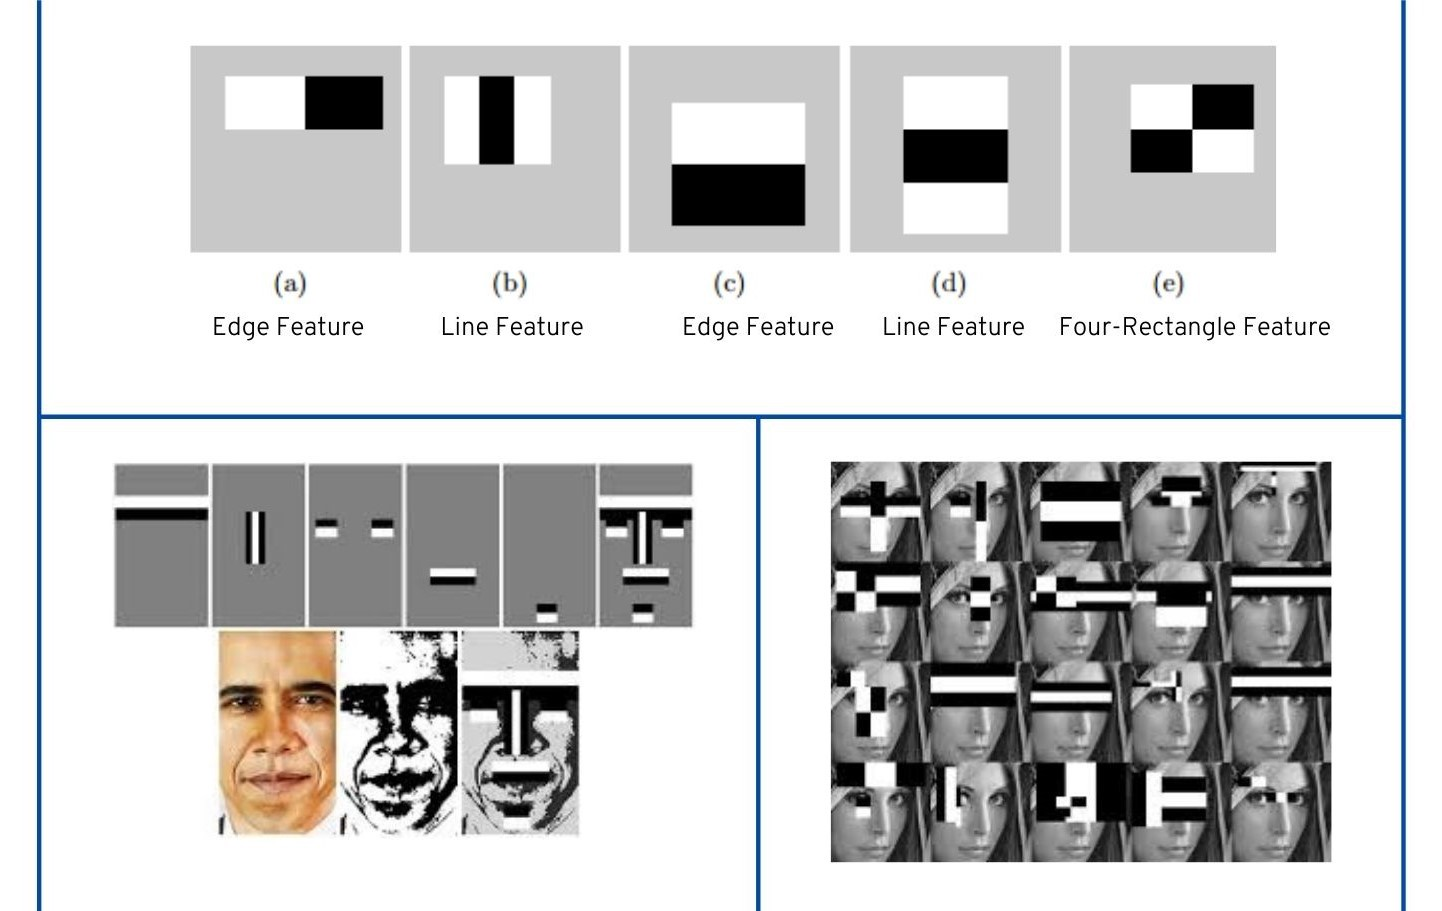

In [ ]:
#loading haarcascade_frontalface_default.xml
face_model = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Demonstrating haar cascade 

Total Faces: 213


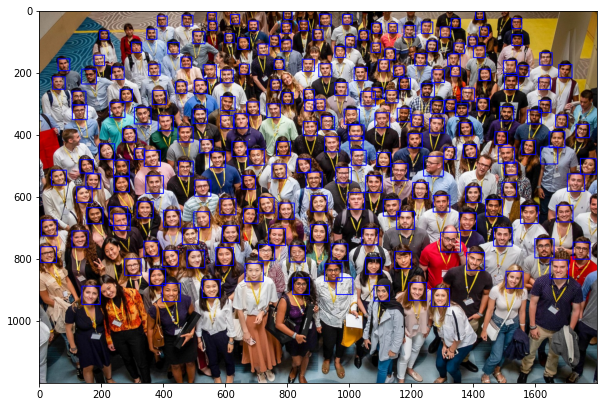

In [ ]:
#trying it out on a sample image
img = cv2.imread('/content/Crowd1.jpg')

img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

faces = face_model.detectMultiScale(img,scaleFactor=1.1, minNeighbors= 4 ) #returns a list of (x,y,w,h) tuples

out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image

#plotting
for (x,y,w,h) in faces:
    cv2.rectangle(out_img,(x,y),(x+w,y+h),(0,0,255),2)
print ("Total Faces: " + str(len(faces)))
plt.figure(figsize=(10,10))
plt.imshow(out_img)

Total Faces: 613


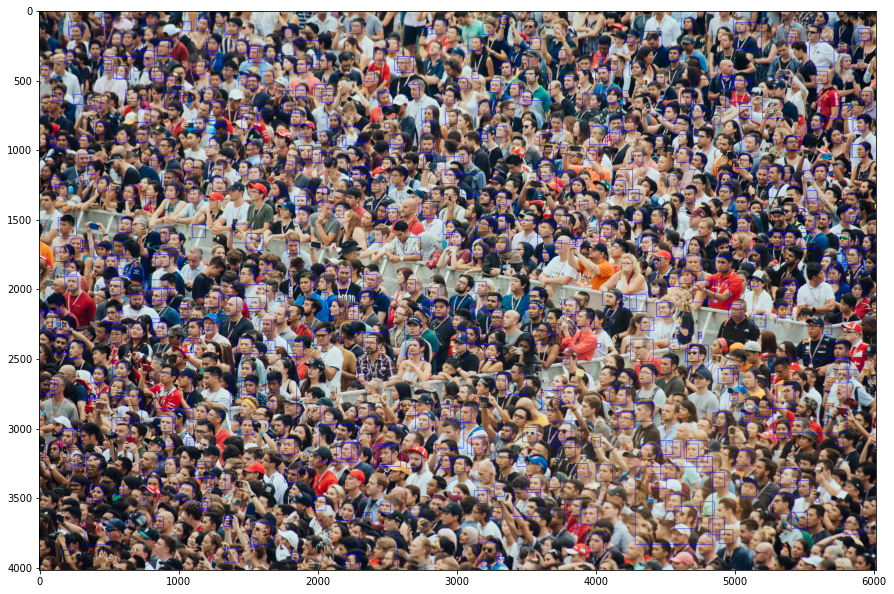

In [ ]:
#trying it out on a sample image
img = cv2.imread('/content/lotsofpersons.jpg')

img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

faces = face_model.detectMultiScale(img,scaleFactor=1.1, minNeighbors= 1 ) #returns a list of (x,y,w,h) tuples

out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image

#plotting
for (x,y,w,h) in faces:
    cv2.rectangle(out_img,(x,y),(x+w,y+h),(0,0,255),2)
print ("Total Faces: " + str(len(faces)))
plt.figure(figsize=(15,15))
plt.imshow(out_img)

# haar cascade Problems

OpenCV haar cascade someimes get avoid false positives.
**solution:**
when calling *detectMultiScale* function, set the *minNeighbours* value to a high value to avoid false positives. Also, you can set the *minSize* parameter to specify a minimum size of face to be detected.


OpenCV haar cascade detect clear faces with high accuracy even if with low quality images .
But it some times get false faces when faces are not clear or partialy covered , in our case, if  coverd with black mask.


Total Faces: 14


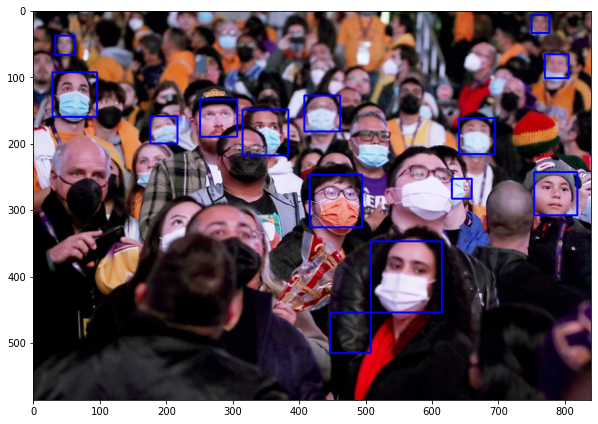

In [ ]:
#trying it out on a sample image
img = cv2.imread('/content/Crowd4.jpeg')

img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

faces = face_model.detectMultiScale(img,scaleFactor=1.1, minNeighbors= 4 ) #returns a list of (x,y,w,h) tuples

out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image

#plotting
for (x,y,w,h) in faces:
    cv2.rectangle(out_img,(x,y),(x+w,y+h),(0,0,255),2)
print ("Total Faces: " + str(len(faces)))
plt.figure(figsize=(10,10))
plt.imshow(out_img)

Total Faces: 45


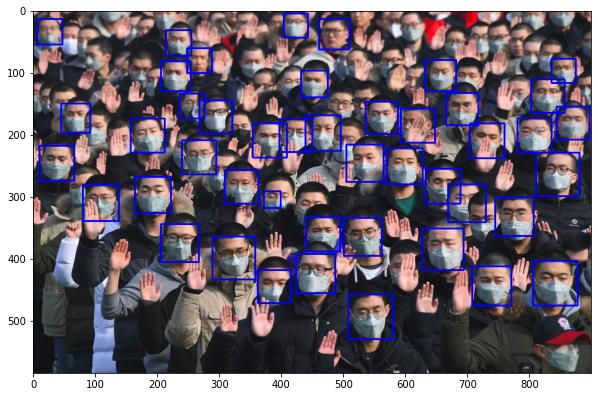

In [ ]:
#trying it out on a sample image
img = cv2.imread('/content/CrowdWithMasks2.jpg')

img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

faces = face_model.detectMultiScale(img,scaleFactor=1.1, minNeighbors= 4 ) #returns a list of (x,y,w,h) tuples

out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image

#plotting
for (x,y,w,h) in faces:
    cv2.rectangle(out_img,(x,y),(x+w,y+h),(0,0,255),2)
print ("Total Faces: " + str(len(faces)))
plt.figure(figsize=(10,10))
plt.imshow(out_img)

Total Faces: 60


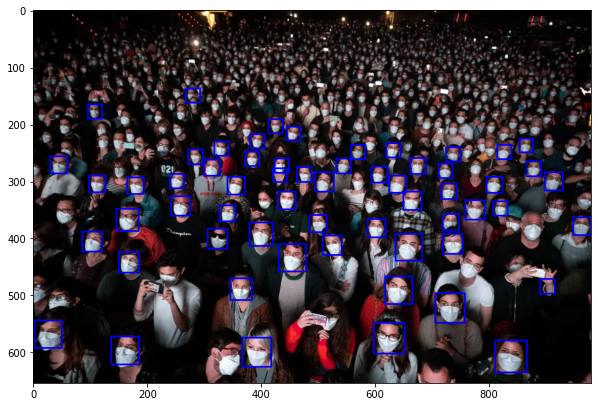

In [ ]:
#trying it out on a sample image
img = cv2.imread('/content/CrowdWithMasks3.jpg')

img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

faces = face_model.detectMultiScale(img,scaleFactor=1.1, minNeighbors= 1 ,minSize=(1,1)) #returns a list of (x,y,w,h) tuples

out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image

#plotting
for (x,y,w,h) in faces:
    cv2.rectangle(out_img,(x,y),(x+w,y+h),(0,0,255),2)
print ("Total Faces: " + str(len(faces)))
plt.figure(figsize=(10,10))
plt.imshow(out_img)

# Using VGG19 for mask detection


In [ ]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras import Sequential
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

# Data augmentation

In [ ]:
#Data augmentation

train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2,shear_range=0.2)
train_generator = train_datagen.flow_from_directory(directory=train_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


# First Trial Model


In [ ]:
'''
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(121, 121, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
'''

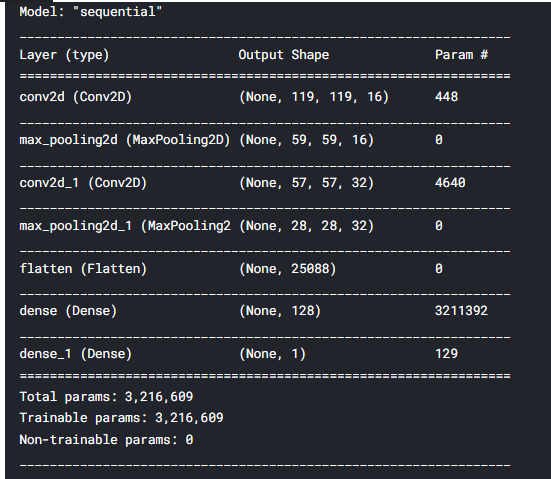

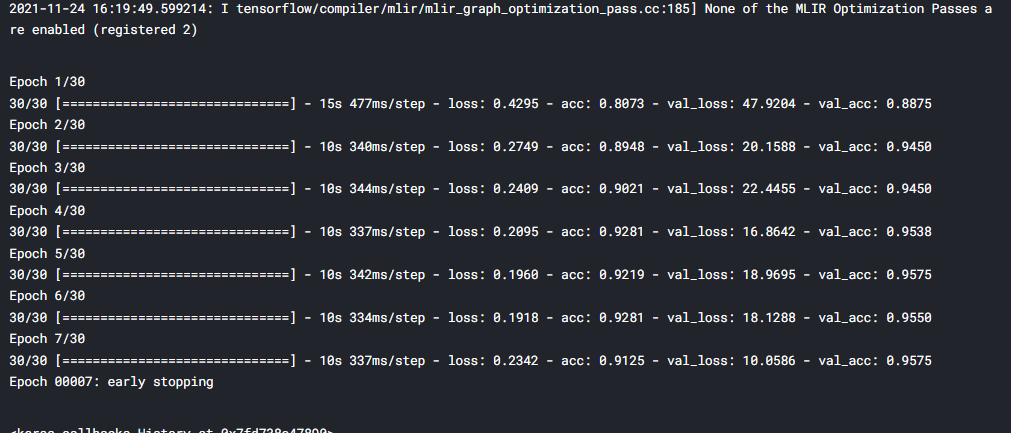

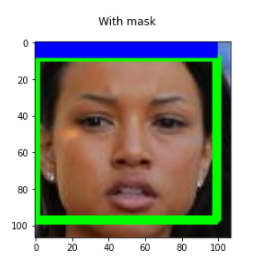

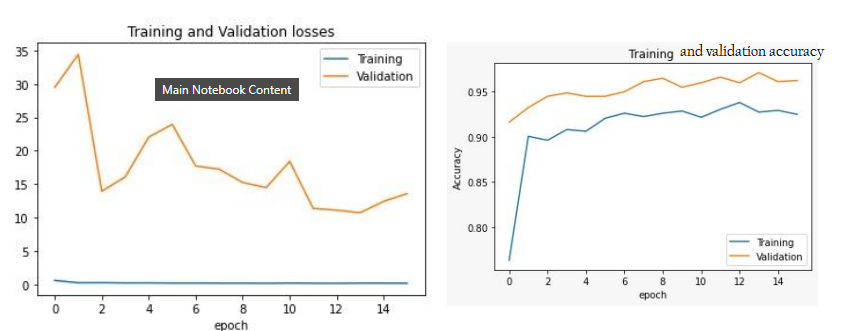

# Building VGG19 transfer learning model 


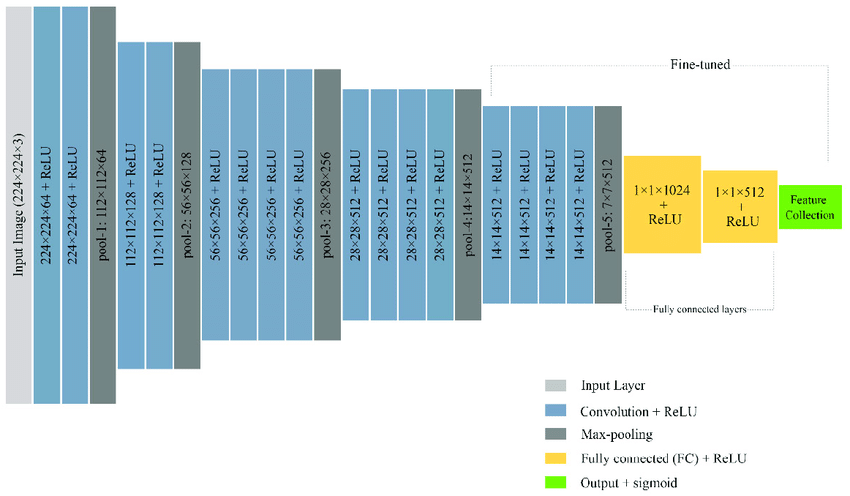

In [ ]:
#transfer learning :     layer.trainable = False
'''
include_top: whether to include the 3 fully-connected layers  at the top of the network.

weights: one of None (random initialization), 'imagenet' (pre-training on ImageNet),
or the path to the weights file to be loaded
'''

vgg19 = VGG19(weights='imagenet',include_top=False,input_shape=(128,128,3))

for layer in vgg19.layers:
    layer.trainable = False
    
model = Sequential()
model.add(vgg19)
model.add(Flatten())
model.add(Dense(2,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 2)                 16386     
                                                                 
Total params: 20,040,770
Trainable params: 16,386
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
checkpoint = ModelCheckpoint("FaceMaskRecognitionModel.h5", monitor='val_accuracy', save_best_only=True, verbose=1)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss="categorical_crossentropy",metrics ="accuracy")

In [ ]:
history=model.fit(train_generator,epochs=30,callbacks = [checkpoint], steps_per_epoch=50, validation_data=val_generator,verbose=1)

Epoch 1/30
50/50 [==============================] - ETA: 0s - loss: 0.9123 - accuracy: 0.8825
Epoch 00001: val_accuracy improved from -inf to 0.97250, saving model to FaceMaskRecognitionModel.h5
50/50 [==============================] - 22s 317ms/step - loss: 0.9123 - accuracy: 0.8825 - val_loss: 0.0813 - val_accuracy: 0.9725
Epoch 2/30
50/50 [==============================] - ETA: 0s - loss: 0.0996 - accuracy: 0.9731
Epoch 00002: val_accuracy did not improve from 0.97250
50/50 [==============================] - 17s 350ms/step - loss: 0.0996 - accuracy: 0.9731 - val_loss: 0.3619 - val_accuracy: 0.9350
Epoch 3/30
50/50 [==============================] - ETA: 0s - loss: 0.1158 - accuracy: 0.9719
Epoch 00003: val_accuracy improved from 0.97250 to 0.97625, saving model to FaceMaskRecognitionModel.h5
50/50 [==============================] - 16s 315ms/step - loss: 0.1158 - accuracy: 0.9719 - val_loss: 0.0766 - val_accuracy: 0.9762
Epoch 4/30
50/50 [==============================] - ETA: 0s - 

Our modela achieved 99% accuracy on test data on eboch 8



In [ ]:
model.evaluate(train_generator)

313/313 [==============================] - 65s 209ms/step - loss: 0.0276 - accuracy: 0.9949


[0.02758868783712387, 0.9948999881744385]

In [ ]:
model.evaluate(test_generator)

25/25 [==============================] - 5s 207ms/step - loss: 0.0544 - accuracy: 0.9950


[0.05444207042455673, 0.9950000047683716]

Text(0.5, 0, 'epoch')

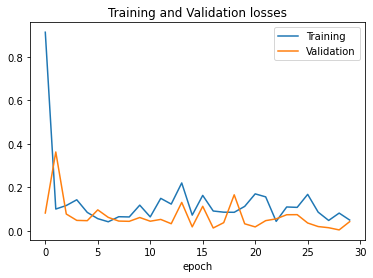

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(['Training', 'Validation'])

plt.title('Training and Validation losses')

plt.xlabel('epoch')

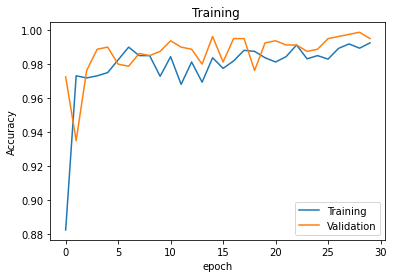

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.legend(['Training', 'Validation'])
plt.title('Training ')

plt.xlabel('epoch')
plt.ylabel('Accuracy')

plt.show()

# Testing the model on the test data

The model is able to classify if the person is wearing a mask or not.



Red boxes shows Validation of rules

# Save the model 


In [ ]:
model.save('FaceMaskRecognitionModel.h5')

[[5.0364202e-11 1.0000000e+00]]
[[4.1393753e-20 1.0000000e+00]]
[[1.2717959e-09 1.0000000e+00]]
[[2.3038772e-10 1.0000000e+00]]


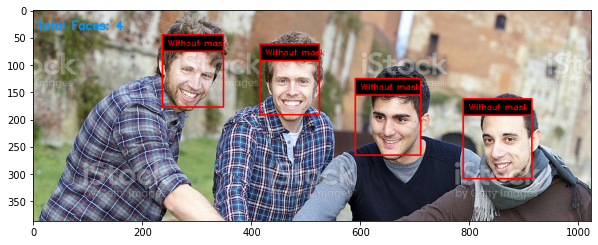

In [ ]:
from tensorflow import keras

#Loading Model
model = keras.models.load_model('FaceMaskRecognitionModel.h5')

cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
img = cv2.imread("4.5guys.jpg", cv2.IMREAD_COLOR)

faces = cascade.detectMultiScale(img)
if len(faces)<1:
          print("face not detected")
          cv2.rectangle(img, (5,5), (190,70), (255, 255, 255), -1)
          cv2.putText(img, "Total Faces: " + str(len(faces)), (7,  35), cv2.FONT_HERSHEY_DUPLEX, 0.7, (255,150, 0), 2)
          cv2.putText(img, "NO Faces recognized", (10, 60), cv2.FONT_HERSHEY_DUPLEX, 0.5, (0,0, 255), 1)

for x, y, w, h in faces:
          face = img[y:y + h, x:x + w]
          face = cv2.resize(face, (128, 128))
          img_scaled = face / 255.0
            #print(img_scaled.shape)
          reshape = np.reshape(img_scaled, (1, 128, 128, 3))
          face = np.vstack([reshape])
          result = model.predict(face)
          print(result)
          cv2.putText(img, "Total Faces: " + str(len(faces)), (7,  35), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,150, 0), 2)
          if result[0,0] >= 0.5:
                  cv2.rectangle(img, (x - 10, y), (x + w, y + h), (0, 255, 0), 2)
                  cv2.rectangle(img, (x - 10, y - 30), (x + w, y), (255, 255,255), -1)
                  cv2.rectangle(img, (x - 10, y - 30), (x + w, y), (0, 255, 0), 2)
                  cv2.putText(img, "With mask", (x, y - 10), cv2.FONT_HERSHEY_DUPLEX, 0.5, (0, 180, 0), 1)

          elif result[0,0] < 0.5:
                  cv2.rectangle(img, (x - 10, y), (x + w, y + h), (0, 0,255), 2)
                  cv2.rectangle(img, (x - 10, y - 30), (x + w, y), (0, 0, 0), -1)
                  cv2.rectangle(img, (x - 10, y - 30), (x + w, y), (0, 0, 255), 2)
                  cv2.putText(img, "Without mask", (x, y - 10), cv2.FONT_HERSHEY_DUPLEX, 0.5, (0,0, 255), 1)

out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image

#plotting

plt.figure(figsize=(10,10))
plt.imshow(out_img)

# WebCam Code

In [ ]:
'''
#importing libraries
import cv2
import numpy
import pandas
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

#Loading Model
model = keras.models.load_model('FaceMaskRecognitionModel.h5')

#setting web cam as video input 
cap = cv2.VideoCapture(0)

cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

while True:
      success, img = cap.read()
      faces = cascade.detectMultiScale(img) # detectMultiScale(img) returns .........
    
#Face Recognition 
    #faces Not Found
      if len(faces)<1:
          print("face not detected")
          cv2.putText(img, "Total Faces: " + str(len(faces)), (7,  35), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,150, 0), 1)
          cv2.putText(img, "NO Faces recognized", (10, 60), cv2.FONT_HERSHEY_DUPLEX, 0.5, (0,0, 255), 1)
     #faces Found   
      else:  
          for x, y, w, h in faces:
              face = img[y:y + h, x:x + w]
              face = cv2.resize(face, (128, 128))
              img_scaled = face / 255.0
                #print(img_scaled.shape)
              reshape = np.reshape(img_scaled, (1, 128, 128, 3))
              face = np.vstack([reshape])
              result = model.predict(face)
              print(result)
              cv2.putText(img, "Total Faces: " + str(len(faces)), (7,  35), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,150, 0), 1)
            
           #Mask Found            
              if result[0,0] >= 0.5:
                  cv2.rectangle(img, (x - 10, y), (x + w, y + h), (0, 255, 0), 2)
                  cv2.rectangle(img, (x - 10, y - 30), (x + w, y), (255, 255,255), -1)
                  cv2.rectangle(img, (x - 10, y - 30), (x + w, y), (0, 255, 0), 2)
                  cv2.putText(img, "With mask", (x, y - 10), cv2.FONT_HERSHEY_DUPLEX, 0.5, (0, 180, 0), 1)
                    
           #Mask Not Found 
              elif result[0,0] < 0.5:
                  cv2.rectangle(img, (x - 10, y), (x + w, y + h), (0, 0,255), 2)
                  cv2.rectangle(img, (x - 10, y - 30), (x + w, y), (0, 0, 0), -1)
                  cv2.rectangle(img, (x - 10, y - 30), (x + w, y), (0, 0, 255), 2)
                  cv2.putText(img, "Without mask", (x, y - 10), cv2.FONT_HERSHEY_DUPLEX, 0.5, (0,0, 255), 1)

    #Showing The Image or The Video frame in a Window
      cv2.imshow("Image", img)
      if cv2.waitKey(1) & 0xFF == ord('q'):
          break
        
cap.release()
cv2.destroyAllWindows()
'''

'\n#importing libraries\nimport cv2\nimport numpy\nimport pandas\nimport tensorflow as tf\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom tensorflow import keras\n\n#Loading Model\nmodel = keras.models.load_model(\'FaceMaskRecognitionModel.h5\')\n\n#setting web cam as video input \ncap = cv2.VideoCapture(0)\n\ncascade = cv2.CascadeClassifier(cv2.data.haarcascades + \'haarcascade_frontalface_default.xml\')\n\nwhile True:\n      success, img = cap.read()\n      faces = cascade.detectMultiScale(img) # detectMultiScale(img) returns .........\n    \n#Face Recognition \n    #faces Not Found\n      if len(faces)<1:\n          print("face not detected")\n          cv2.putText(img, "Total Faces: " + str(len(faces)), (7,  35), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,150, 0), 1)\n          cv2.putText(img, "NO Faces recognized", (10, 60), cv2.FONT_HERSHEY_DUPLEX, 0.5, (0,0, 255), 1)\n     #faces Found   \n      else:  \n          for x, y, w, h in faces:\n              face = img[y:y + h, 

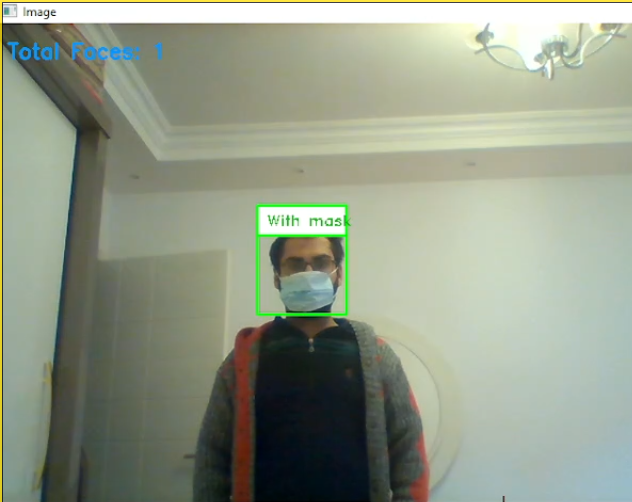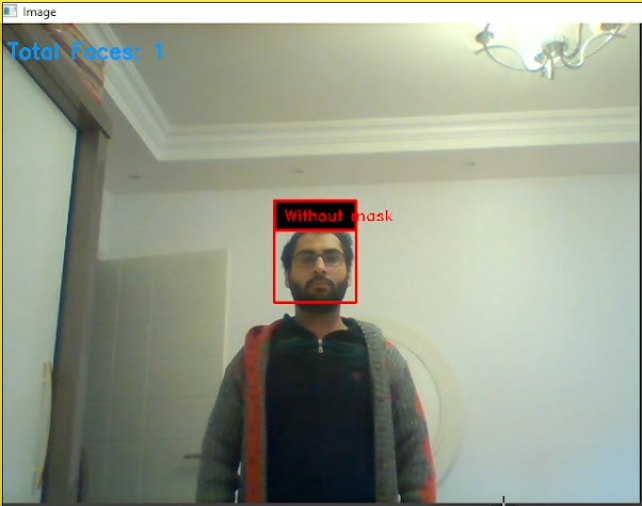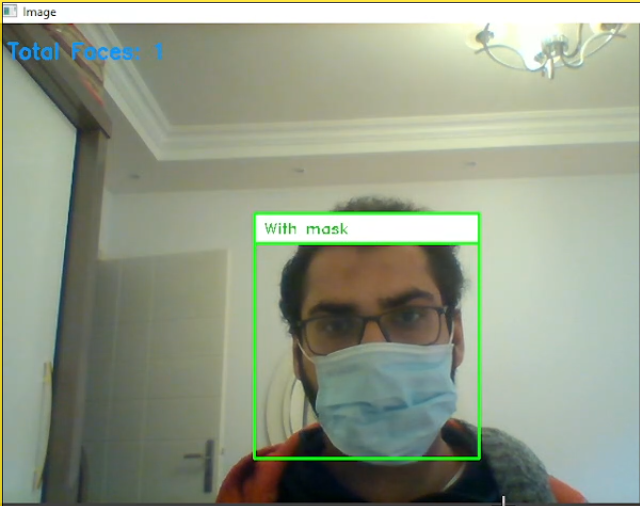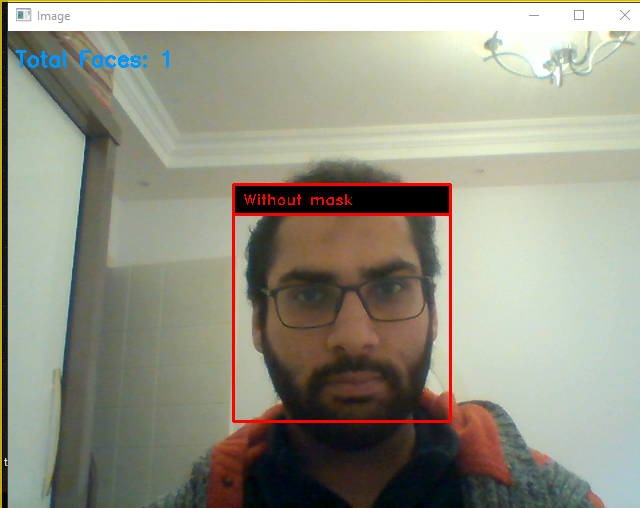

# With No faces 

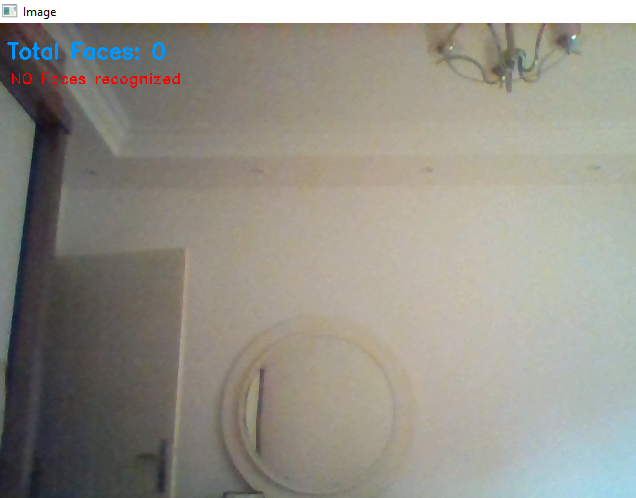